### Task: Run and analyze an existing cellular automaton

* The code below implements the traffic simulator you saw in the previous activity.
* We use Sayama's pycxsimulator library to step through the cellular automaton simulation, which means that you can run this same code on your own computer.
* Run the code below.


In [1]:
interactive = False  # Set this variable to True to run an interactive
                     # simulator. This will not work on CoCalc.

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import pylab
import random
import numpy as np

In [2]:
class TrafficSimulator(object):

    # Mapping from the current state of a cell's neighborhood to the next state
    # of the cell. This corresponds to Wolfram's Rule 184.
    ca_map = {
        (0, 0, 0): 0,
        (0, 0, 1): 0,
        (0, 1, 0): 0,
        (0, 1, 1): 1,
        (1, 0, 0): 1,
        (1, 0, 1): 1,
        (1, 1, 0): 0,
        (1, 1, 1): 1}

    def __init__(self, length=50, density=0.2, interactive=False):
        '''
        Initialize new TrafficSimulator objects with the default parameter
        settings.

        Inputs:

         * length (int) The number of cells in the cellular automaton.
           Default: 50.

         * density (float) The proportion of cells that will be active (contain
           a car) when the cellular automaton is initialized. The active cells
           will be at random locations along the length of the CA. Default: 0.2.

         * interactive (bool) Whether or not we are running an interactive
           simulation. In CoCalc we have to run in non-interactive mode (False),
           but in your local Python environment you should be able to run in
           interactive mode (True). Default: False.

        '''
        self.interactive = interactive
        self.length = length
        self.density = density

        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = np.zeros(self.length)
        self.next_state = np.zeros(self.length)

    def initialize(self):
        '''
        This will be called by the interactive pycxsimulator whenever the Reset
        button is clicked.
        '''
        # Set up a random initial state where the fraction of 1s in the array
        # equals the density parameter.
        random_indices = np.random.choice(
            range(self.length),
            size=int(round(self.density * self.length)),
            replace=False)
        self.current_state.fill(0)
        self.current_state[random_indices] = 1

        self.time = 0

    def draw(self):
        '''
        Draw the current state of the cellular automaton.
        '''
        if self.interactive:
            pylab.cla()  # Clear the current figure
        else:
            pylab.figure()  # Create a new figure
        pylab.pcolor(
            self.current_state.reshape((1, self.length)),
            vmin = 0,
            vmax = 1,
            cmap = pylab.cm.binary)
        pylab.axis('image')
        pylab.title('density = ' + str(self.density) + '; t = ' + str(self.time))
        if not self.interactive:
            pylab.show()

    def step(self):
        '''
        Update the state of the cellular automaton.
        '''
        # Update all cells, except the boundaries.
        for i in range(1, self.length - 1):
            neighborhood = self.current_state[i-1:i+2]
            self.next_state[i] = self.ca_map[tuple(neighborhood)]
        # Update the boundaries using periodic boundary conditions.
        neighborhood = self.current_state[[-1, 0, 1]]
        self.next_state[0] = self.ca_map[tuple(neighborhood)]
        neighborhood = self.current_state[[-2, -1, 0]]
        self.next_state[-1] = self.ca_map[tuple(neighborhood)]
        # Swap next state and current state
        self.current_state, self.next_state = self.next_state, self.current_state
        self.time += 1

    def set_density(self, value=None):
        '''
        The density of cars on the road. Only affects initialization (reset) of
        the simulation. The density must be a value between 0 and 1.
        '''
        if value is not None:
            self.density = min(1, max(0, float(value)))
        return self.density

In [11]:
def simulation(param):
    sim = TrafficSimulator(density=param, interactive=interactive)
    if interactive:
        # Set up the interactive user interface.
        import pycxsimulator
        gui = pycxsimulator.GUI(parameterSetters=[sim.set_density])
        gui.start(func=[sim.initialize, sim.draw, sim.step])
    else:
        # Run the simulator for 100 steps and show some of the steps.
        print('\n#################### Initial state ####################')
        sim.initialize()
        sim.draw()

        print('Next 5 states:')
        for i in range(5):
            sim.step()
            sim.draw()
            print('')

        print('After 100 steps:')
        for i in range(95):
            sim.step()
        sim.draw()


#################### Initial state ####################


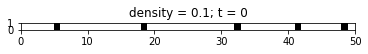

Next 5 states:


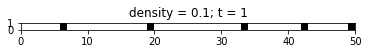

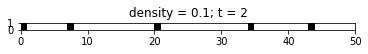

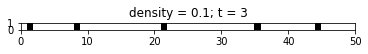

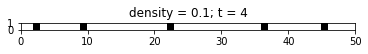

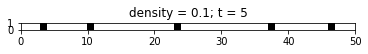


After 100 steps:


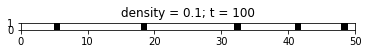


#################### Initial state ####################


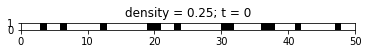

Next 5 states:


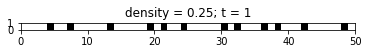

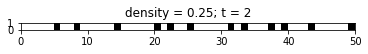

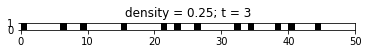

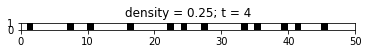

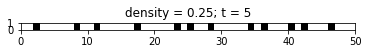


After 100 steps:


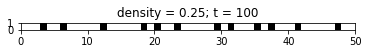


#################### Initial state ####################


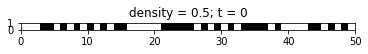

Next 5 states:


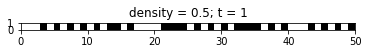

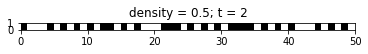

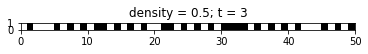

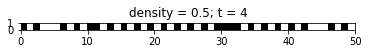

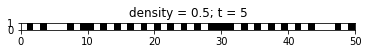


After 100 steps:


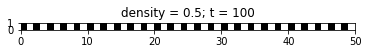


#################### Initial state ####################


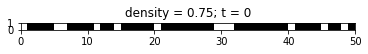

Next 5 states:


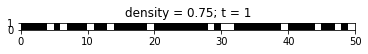

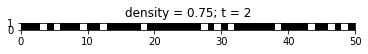

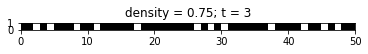

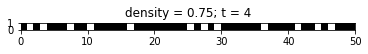

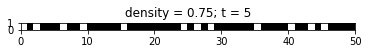


After 100 steps:


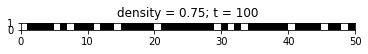

In [12]:
for _ in [.1, .25, .5, .75]:
    simulation(_)